In [3]:
!pip install fastdtw numpy

    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [11]:
import whisper
import librosa

path_audio = '../uploads/recording.wav'
model = whisper.load_model("base")  # Load the Whisper model
result = model.transcribe(path_audio, language='en', beam_size=5, best_of=3)  # Transcribe the audio

print(result)

/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


{'text': ' We are to establish an environment, just support sustainable practice.', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 7.0, 'text': ' We are to establish an environment, just support sustainable practice.', 'tokens': [50364, 492, 366, 281, 8327, 364, 2823, 11, 445, 1406, 11235, 3124, 13, 50714], 'temperature': 0.0, 'avg_logprob': -0.6237802505493164, 'compression_ratio': 1.0144927536231885, 'no_speech_prob': 0.026184067130088806}], 'language': 'en'}


1) no_speech_prob
- Logits: Raw scores from the model for different classes (e.g., speech, no speech).
- Softmax Function: Converts logits into probabilities.
- No Speech Probability: The probability for the "no speech" class after applying softmax.


$$
\text{no\_speech\_prob} = \sum_{j} e^{z_j} / e^{z_{\text{no\_speech}}}
$$


In [5]:
audio = whisper.load_audio(path_audio)

mel = whisper.log_mel_spectrogram(audio)
print(mel.shape)

torch.Size([80, 384])


In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_mel_spectrogram(audio_file, title="Mel Spectrogram", n_mels=128, fmax=8000):
    """
    Plots a mel spectrogram of an audio file.

    Parameters:
    - audio_file (str): Path to the audio file.
    - title (str): Title of the plot.
    - n_mels (int): Number of Mel bands to generate.
    - fmax (int): Highest frequency (in Hz) to include in the Mel spectrum.
    """
    try:
        y, sr = librosa.load(audio_file, sr=None)
    except Exception as e:
        print(f"Error loading audio file: {e}")
        return

    # Compute the mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)

    # Plot the log-mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()


/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_97050/1883389109.py:17: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)
/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


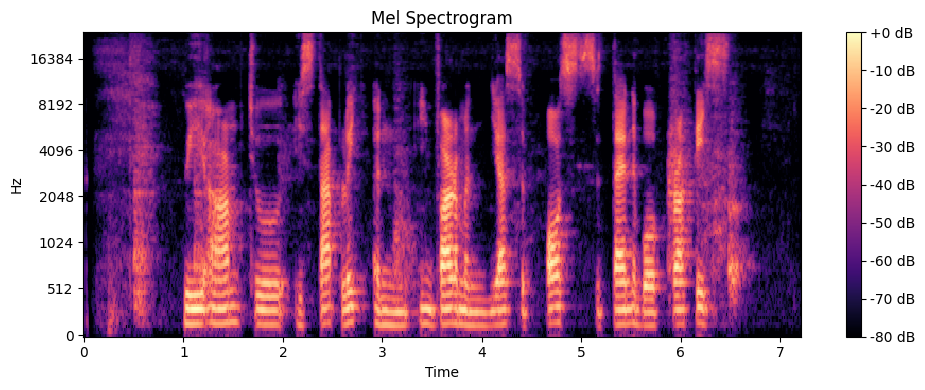

In [13]:
plot_mel_spectrogram(path_audio)

In [15]:
import nltk
nltk.download('cmudict')

[nltk_data] Downloading package cmudict to /Users/ngocp/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


True

In [32]:
from nltk.corpus import cmudict
from termcolor import colored

# Load the CMU Pronouncing Dictionary
d = cmudict.dict()
print(f"Number of words in the CMU Pronouncing Dictionary: {len(d)}")
print(f"Pronunciation of 'hello': {d['hello']}")
# Get the pronunciation of a word
word = "hello"
# pronunciation = d[word.lower()][0]
# print(pronunciation)


Number of words in the CMU Pronouncing Dictionary: 123455
Pronunciation of 'hello': [['HH', 'AH0', 'L', 'OW1'], ['HH', 'EH0', 'L', 'OW1']]


In [58]:

def get_phonetic_transcription(word):
    """Returns the phonetic transcription of a word."""
    return d.get(word.lower())

def syllable_to_char_map(word, syllables):
    """Map each syllable to its corresponding characters in the word."""
    char_map = []
    start = 0
    for syllable in syllables:
        end = start + len(syllable)
        char_map.append(word[start:end])
        start = end
    return char_map

def highlight_syllables(expected_syllables, actual_syllables, word):
    """Highlight each syllable, red for wrong syllable, green for right syllable."""
    highlighted = []
    char_map = syllable_to_char_map(word, actual_syllables)
    for exp_syl, act_syl, chars in zip(expected_syllables, actual_syllables, char_map):
        print(f"highlight_syllables: {exp_syl} -> {act_syl} -> {chars}")
        if exp_syl == act_syl:
            highlighted.append(f'<span style="color: green;">{chars}</span>')
        else:
            highlighted.append(f'<span style="color: red;">{chars}</span>')
    return highlighted

def compare_phonetic_transcriptions(expected, actual):
    """Compare the phonetic transcriptions of the expected and actual words."""
    feedback = []
    for exp_word, act_word in zip(expected.split(), actual.split()):
        exp_phonetic = get_phonetic_transcription(exp_word)
        act_phonetic = get_phonetic_transcription(act_word)
        print(f"Expected: {exp_word} -> {exp_phonetic} -> {act_word}")
        if exp_phonetic and act_phonetic:
            exp_syllables = [syllable for phoneme in exp_phonetic for syllable in phoneme]
            act_syllables = [syllable for phoneme in act_phonetic for syllable in phoneme]
            highlighted_syllables = highlight_syllables(exp_syllables, act_syllables, act_word)
            feedback.append({'word': act_word, 'highlighted_syllables': ''.join(highlighted_syllables)})
        else:
            feedback.append({'word': act_word, 'highlighted_syllables': f'<span style="color: red;">{act_word}</span>'})
    
    return feedback

In [59]:
user_text = "We are to establish an environment, just support sustainable practices."
reference_text = "We ought to establish an environment that supports sustainable practices."

feedback = compare_phonetic_transcriptions(user_text, reference_text)

for item in feedback:
    print(item)

Expected: We -> [['W', 'IY1']] -> We
highlight_syllables: W -> W -> W
highlight_syllables: IY1 -> IY1 -> e
Expected: are -> [['AA1', 'R'], ['ER0']] -> ought
highlight_syllables: AA1 -> AO1 -> oug
highlight_syllables: R -> T -> h
Expected: to -> [['T', 'UW1'], ['T', 'IH0'], ['T', 'AH0']] -> to
highlight_syllables: T -> T -> t
highlight_syllables: UW1 -> UW1 -> o
highlight_syllables: T -> T -> 
highlight_syllables: IH0 -> IH0 -> 
highlight_syllables: T -> T -> 
highlight_syllables: AH0 -> AH0 -> 
Expected: establish -> [['IH0', 'S', 'T', 'AE1', 'B', 'L', 'IH0', 'SH'], ['IY0', 'S', 'T', 'AE1', 'B', 'L', 'IH0', 'SH']] -> establish
highlight_syllables: IH0 -> IH0 -> est
highlight_syllables: S -> S -> a
highlight_syllables: T -> T -> b
highlight_syllables: AE1 -> AE1 -> lis
highlight_syllables: B -> B -> h
highlight_syllables: L -> L -> 
highlight_syllables: IH0 -> IH0 -> 
highlight_syllables: SH -> SH -> 
highlight_syllables: IY0 -> IY0 -> 
highlight_syllables: S -> S -> 
highlight_syllable

In [17]:
def syllable_count(word):
    """Returns the number of syllables in a word."""
    if word.lower() in d:
        return [len(list(y for y in x if y[-1].isdigit())) for x in d[word.lower()]][0]
    else:
        return len([char for char in word if char in 'aeiouy'])

In [ ]:
import subprocess

def get_ipa_transcription(text):
    result = subprocess.run(
        ['espeak-ng', '-x', text, '--ipa'],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    return result.stdout.strip()


In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def compare_phonetic_sequences(seq1, seq2):
    # Convert IPA sequences to numerical representation if needed
    # For simplicity, this example uses string comparison
    distance, path = fastdtw(seq1, seq2, dist=euclidean)
    return distance, path

In [ ]:
def highlight_discrepancies(user_text, user_phonetic, expected_phonetic):
    discrepancies = []
    for i, (user, expected) in enumerate(zip(user_phonetic, expected_phonetic)):
        if user != expected:
            discrepancies.append((i, user, expected))
    return discrepancies

# Example usage
user_text = "Hello, how are you?"
expected_text = "Hello, how are you?"

path_user_voice = "../uploads/recording.wav"
user_transcription = transcribe_audio(path_user_voice)
print('user_transcription:', user_transcription)

expected_phonetic = get_ipa_transcription(expected_text)
user_phonetic = get_ipa_transcription(user_transcription)

print("Expected phonetic transcription:", expected_phonetic, user_phonetic)
distance, path = compare_phonetic_sequences(user_phonetic.split(), expected_phonetic.split())
discrepancies = highlight_discrepancies(user_transcription, user_phonetic.split(), expected_phonetic.split())

print("Discrepancies:", discrepancies)


/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


user_transcription:  secret is simple sentence.
Expected phonetic transcription: həlˈəʊ
hˈaʊ ɑː juː sˈiːkɹɪt ɪz sˈɪmpəl sˈɛntəns


ValueError: could not convert string to float: 'sˈiːkɹɪt'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = '../uploads/recording.wav'

In [ ]:
output_file = '../uploads/output.mp3'

# Verify the WAV file
verify_wav_file(file_path)

# Convert the WAV file to MP3 format
convert_wav_to_mp3(file_path, output_file)

ffmpeg version 7.0.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.0.1 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_79502/2906481041.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)  # y is the audio time series, sr is the sample rate
/Users/ngocp/.pyenv/versions/3.10.3/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


D: (1025, 361) [-6.10243151e-05+0.j -4.83685231e-04+0.j -2.74017896e-03+0.j
 -4.39396407e-03+0.j -3.68450815e-03+0.j -3.11435130e-03+0.j
 -2.57819629e-05+0.j  1.49772922e-03+0.j  5.77885541e-04+0.j
  2.55279895e-03+0.j  3.12177790e-03+0.j  7.83629424e-04+0.j
  9.47210181e-04+0.j  2.03568442e-03+0.j  2.12455270e-04+0.j
 -2.84945709e-03+0.j -3.06444033e-03+0.j -4.54447843e-04+0.j
  9.30677343e-04+0.j  2.51296023e-03+0.j  5.07682143e-03+0.j
  2.98318546e-03+0.j -2.29335926e-03+0.j -1.07504171e-03+0.j
  3.30708013e-03+0.j  1.31497451e-03+0.j -2.57462426e-03+0.j
 -3.35552031e-03+0.j  2.49920675e-04+0.j  3.45064094e-03+0.j
  4.65140591e-04+0.j -3.08396062e-03+0.j -3.86378192e-03+0.j
 -4.22192458e-03+0.j -1.82607200e-03+0.j  1.37132453e-03+0.j
 -7.73907756e-04+0.j -1.46391382e-03+0.j -1.52130472e-03+0.j
  1.56411275e-04+0.j  1.99298444e-03+0.j  9.19311948e-04+0.j
  1.27080618e-03+0.j  1.24412996e-03+0.j -1.13581074e-03+0.j
 -2.72879540e-03+0.j  2.31095531e-04+0.j -3.00094456e-04+0.j
 -2.04764

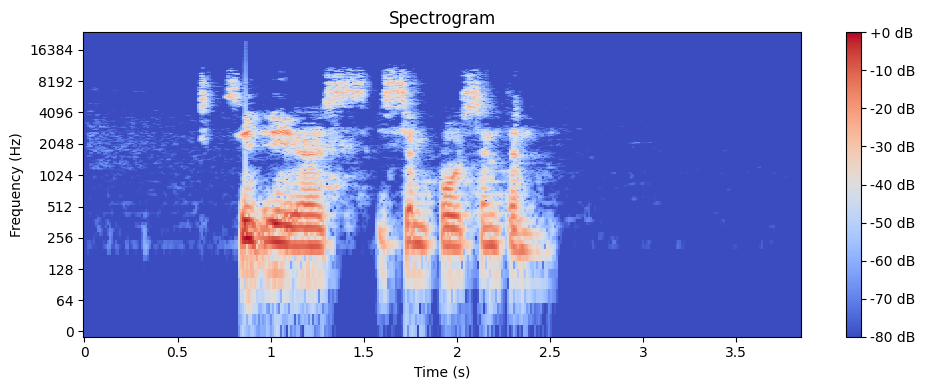

In [ ]:

y, sr = librosa.load(file_path, sr=None)  # y is the audio time series, sr is the sample rate

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)  # Compute the STFT
print('D:', D.shape, D[0])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to decibels

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()
